In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:

ds= pd.read_csv('Social_Network_Ads.csv')
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [76]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [77]:
ds.duplicated().sum()

np.int64(33)

In [78]:
ds.drop_duplicates(inplace=True)

In [79]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB


In [80]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [81]:
#checking for missing values
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [82]:
#splitting dataset in Independent and Dependent variables
x=ds[['Age', 'EstimatedSalary']]
y=ds[['Purchased']]

In [83]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)

In [84]:
#model selection and model fitting with train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30 , random_state=0)

In [67]:
#fitting decision tree classifier
from sklearn.tree import DecisionTreeClassifier
cls= DecisionTreeClassifier(criterion='entropy', random_state=1)
cls.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

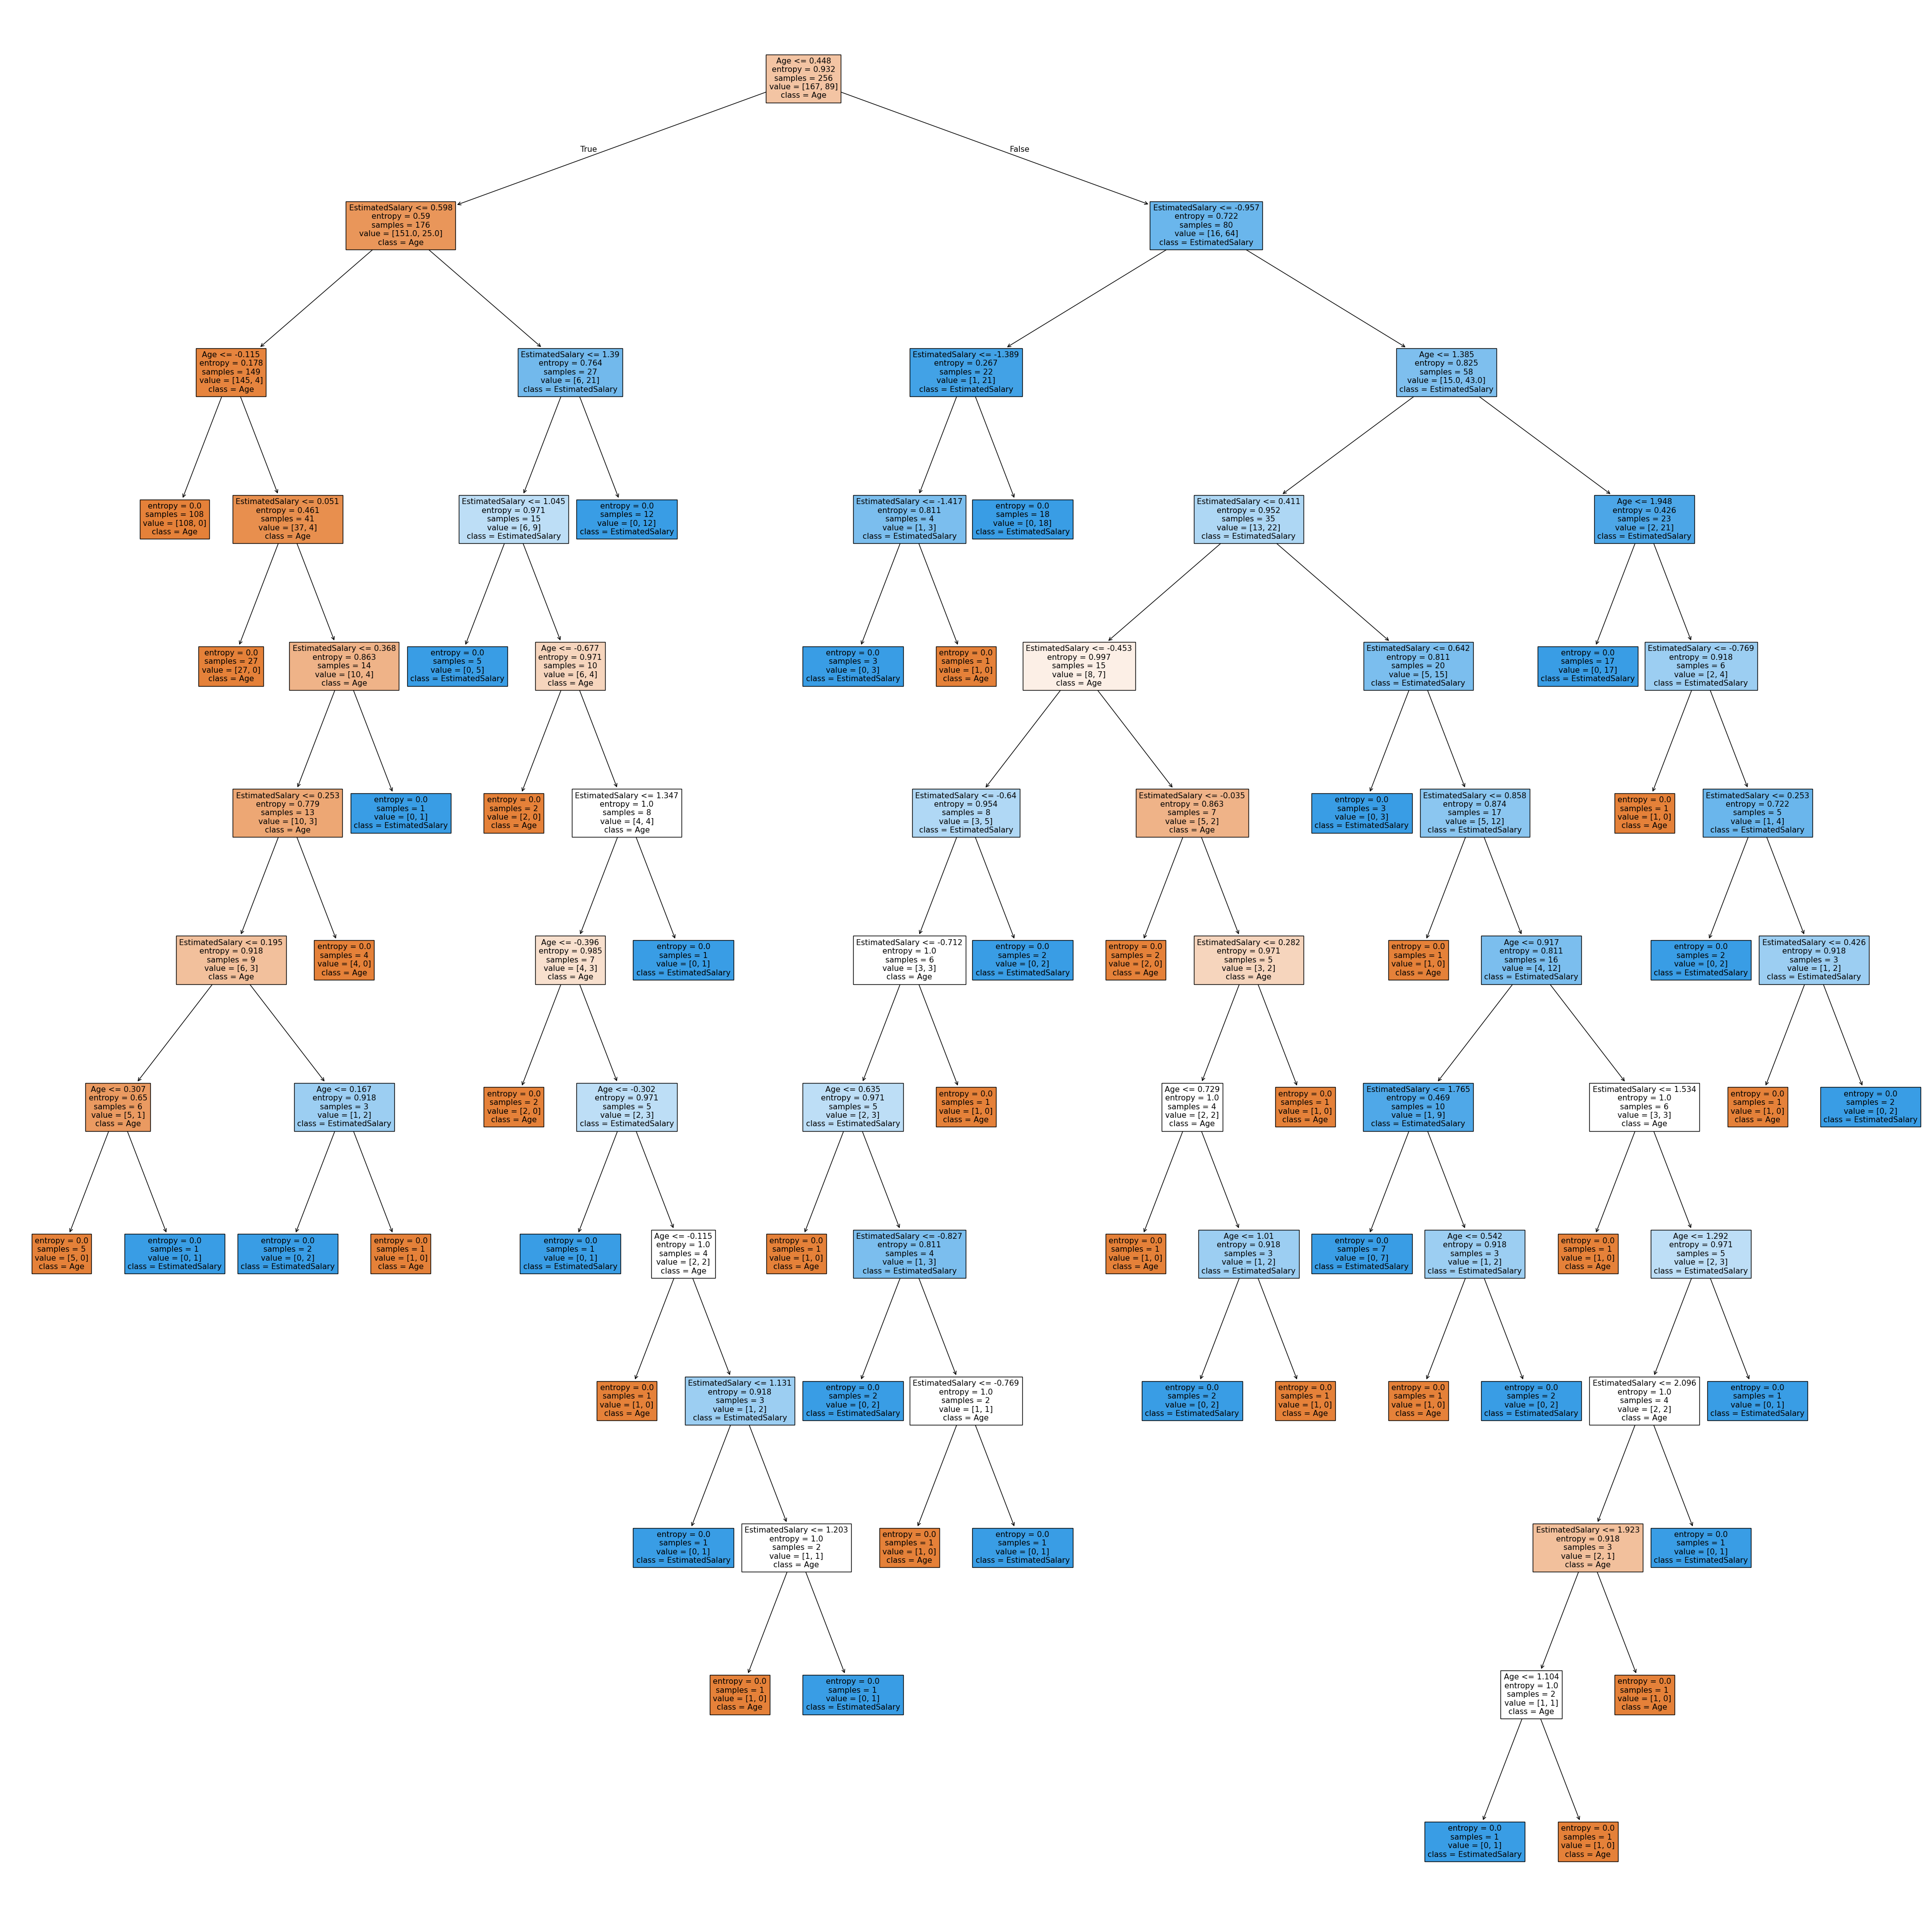

In [69]:
#ploting decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(cls,filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Age', 'EstimatedSalary'])
plt.show()

In [70]:
#predict for myip
res= cls.predict(sc.transform([[30,150000]]))
res

array([1])

In [71]:
#Accuracy score
from sklearn.metrics import accuracy_score
y_pred= cls.predict(x_test)

score= accuracy_score(y_test,y_pred)

print(f"Accuracy {score*100:.2f}%")

Accuracy 83.78%


In [73]:
#user ip

age= float(input('Enter age : '))
salary = float(input('Enter salary : '))

myip= pd.DataFrame(data=[[age,salary]], columns=['Age','EstimatedSalary'])
res= cls.predict(myip)

if res[0]== 1:
    print('prediction : user will purchase plan')
else:
    print('prediction : user will not purchase plan')


Enter age :  45
Enter salary :  56000


prediction : user will purchase plan
